# Representing geographic data in Python

In this chapter, we will learn how geometric objects (in vector format) are represented in Python using a library called [shapely](https://shapely.readthedocs.io/en/stable/manual.html) [^shapely]. In the following parts of the book, we will use a library called **geopandas** extensively which uses these **shapely** geometries to represent the geographic data in vector format. Understanding how these geometric objects work and can be created in Python is extremely useful, because these objects are the fundamental buildings blocks that enable us doing geographic data analysis. 

## Creating vector geometries with shapely 

**Shapely** is a fundamental Python package for representing vector data geometries on a computer. Basic knowledge of shapely is important for using higher-level tools that depend on it, such as geopandas. Under the hood shapely uses a C++ library called [GEOS](https://trac.osgeo.org/geos) [^GEOS] to construct the geometries, which is one of the standard libraries behind various Geographic Information Systems (GIS) software, such as [PostGIS](https://postgis.net/) [^PostGIS] or [QGIS](http://www.qgis.org/en/site/) [^QGIS]. Objects and methods available in shapely adhere mainly to [the Open Geospatial Consortium’s Simple Features Access Specification](https://www.ogc.org/standards/sfa) [^OGC_sfa], as discussed in Chapter 5, making them compatible with various GIS tools. In this section, we give a quick overview of creating geometries using shapely. For a full list of shapely -related objects and methods, see [the shapely user manual online](https://shapely.readthedocs.io/en/stable/manual.html) [^shapely].

### Creating point geometries

When creating geometries with shapely, we first need to import the geometric object class (such as `Point`) that we want to create from `shapely.geometry` which contains classes to create all possible geometry types. After importing the `Point` class, creating a point is easy: we just pass `x` and `y` coordinates into the `Point()` -class (with a possible `z` -coordinate) which will create the point for us:

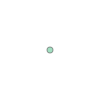

In [26]:
from shapely.geometry import Point

point = Point(2.2, 4.2)
point3D = Point(9.26, -2.456, 0.57)

point

_**Figure 6.1**. A visual representation of a Shapely Point geometry._

As we can see, Jupyter Notebook is able to visualize the point shape on the screen. This point demonstrates a very simple geographic object that we can start using in geographic data analysis. Notice that without information about a coordinate reference system (CRS) attached to the geometry, these coordinates are ultimately just arbitrary numbers that do not represent any specific location on Earth. We will learn later in the book, how it is possible to specify a CRS for a set of geometries using geopandas library.

We can use the `print()` statement to get the text representation of the point geometry as [Well Known Text (WKT)](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry) [^WKT]. In the output, the letter `Z` after the `POINT` indicates that the geometry contains coordinates in three dimensions (x, y, elevation):

In [27]:
print(point)
print(point3D)

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)


It is also possible to access the WKT presentation of the geometry (without printing) using the `.wkt` attribute:

In [28]:
point.wkt

'POINT (2.2 4.2)'

One useful thing that you can do with these point objects is to extract specific geographic information from them, such as coordinates of the point. There are different approaches for extracting the coordinates into numerical values. One of them is a property called `.coords` which gives us access to the coordinates. The `.coords` attribute returns the coordinates of the point geometry as a `CoordinateSequence` which is a dedicated data structure for storing a list of coordinates. For our purposes, we can convert the `coords` into a list that makes the values visible and make it easy to access the contents: 

In [3]:
type(point.coords)

shapely.coords.CoordinateSequence

In [4]:
list(point.coords)

[(2.2, 4.2)]

It is also possible to access the coordinates directly using the `x` and `y` properties of the `Point` object:

In [5]:
print(point.x)
print(point.y)

2.2
4.2


Points and other shapely objects have many useful built-in attributes and methods. See [shapely documentation ](https://shapely.readthedocs.io/en/stable/manual.html#general-attributes-and-methods) [^shapely] for a full list. For example, it is possible to calculate the Euclidian distance between points, or to create a buffer polygon for the point object. All of these functionalities are integrated into geopandas library, and we will go through them later in the book. 


### Creating LineString geometries


Creating a `LineString` -object is very similar to creating a `Point`-object. To be able to create a `LineString`, we need at least two points that are connected to each other, which thus constitute a line. We can construct the line using either a list of `Point`-objects or pass the point coordinates as coordinate-tuples to the `LineString` constructor:

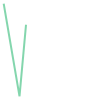

In [6]:
from shapely.geometry import Point, LineString

point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)

line = LineString([point1, point2, point3])
line_from_tuples = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])
line

_**Figure 6.2**. A visual representation of a Shapely LineString geometry._

In [29]:
line.wkt

'LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)'

As we can see from above, the WKT representation of the `line` -variable constitutes of multiple coordinate-pairs. `LineString` -objects have many useful built-in attributes and methods similarly as `Point` -objects. It is for instance possible to extract the coordinates, calculate the length of the `LineString`, find out the centroid of the line, create points along the line at specific distance, calculate the closest distance from a line to specified Point, or simplify the geometry. A full list of functionalities can again be read from [shapely documentation](https://shapely.readthedocs.io/en/stable/manual.html) [^shapely]. Most of these functionalities are directly implemented in geopandas (see next chapter). Hence, you very seldomly need to parse these information directly from the shapely geometries yourself. However, here we go through a few of them for reference. We can extract the coordinates of a LineString similarly as with `Point`:

In [8]:
list(line.coords)

[(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]

As a result, we have a list of coordinate tuples (x,y) inside a list. If you need to access all `x` -coordinates or all `y` -coordinates of the line, you can do it directly using the `xy` attribute: 

In [9]:
xcoords = list(line.xy[0])
ycoords = list(line.xy[1])

print(xcoords)
print(ycoords)

[2.2, 7.2, 9.26]
[4.2, -25.1, -2.456]


It is possible to retrieve specific attributes such as `length` of the line and center of the line (`centroid`) straight from the `LineString` object itself:

In [10]:
length = line.length
centroid = line.centroid
print(f"Length of our line: {length:.2f} units")
print(f"Centroid: {centroid}")

Length of our line: 52.46 units
Centroid: POINT (6.229961354035622 -11.892411157572392)


As you can see, the centroid of the line is again a `shapely.geometry.Point` object. This is useful, because it means that you can continue working with the line centroid having access to all of the methods that come with the shapely `Point` object.

### Creating Polygon geometries

Creating a `Polygon` -object continues the same logic as when creating `Point` and `LineString` objects. A `Polygon` can be created by passing a list of `Point` objects or a list of coordinate-tuples as input for the `Polygon` class. `Polygon` needs at least three coordinate-tuples to form a surface. In the following, we use the same points from the earlier `LineString` example to create a `Polygon`.

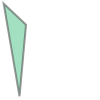

In [11]:
from shapely.geometry import Polygon

poly = Polygon([point1, point2, point3])
poly

_**Figure 6.3**. A visual representation of a Shapely Polygon geometry._

In [30]:
poly.wkt

'POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))'

Notice that the `Polygon` WKT representation has double parentheses around the coordinates (i.e. `POLYGON ((<values in here>))` ). This is because Polygon can also have holes inside of it. A `Polygon` is constructed from *exterior* ring and and optiona *interior* ring, that can be used to represent a hole in the polygon. You can get more information about the `Polygon` object by running `help(poly)` of from the [shapely online documentation](https://shapely.readthedocs.io/en/stable/manual.html?highlight=Polygon#Polygon) [^polygon]. Here is a simplified extract from the output of `help(Polygon)`:

```
class Polygon(shapely.geometry.base.BaseGeometry)
 |  Polygon(shell=None, holes=None)
 |  
 |  A two-dimensional figure bounded by a linear ring
 |  
 |  A polygon has a non-zero area. It may have one or more negative-space
 |  "holes" which are also bounded by linear rings. If any rings cross each
 |  other, the feature is invalid and operations on it may fail.
 |  
 |  Attributes
 |  ----------
 |  exterior : LinearRing
 |      The ring which bounds the positive space of the polygon.
 |  interiors : sequence
 |      A sequence of rings which bound all existing holes.
 |  
 |  Parameters
 |  ----------
 |  shell : sequence
 |     A sequence of (x, y [,z]) numeric coordinate pairs or triples.
 |     Also can be a sequence of Point objects.
 |  holes : sequence
 |      A sequence of objects which satisfy the same requirements as the
 |      shell parameters above
```

If we want to create a `Polygon` with a hole, we can do this by using parameters `shell` for the exterior and `holes` for the interiors. In the following, we see how to create a `Polygon` with a hole in it. Notice, that because a `Polygon` can have multiple holes, the `hole_coords` variable below contains nested square brackets (`[[ ]]`), which is due to the possibility of having multiple holes in a single `Polygon`. First, let's define the coordinates for the exterior and interior rings:

In [13]:
# Define the exterior
exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

# Define the hole
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

The attribute `exterior` contains the `x` and `y` coordinates of all the corners of the `Polygon` as a list of tuples. For instance, the first tuple `(-180, 90)` contains coordinates for the top-left corner of the `Polygon`. With these four coordinate tuples, we can first create a polygon without a hole:

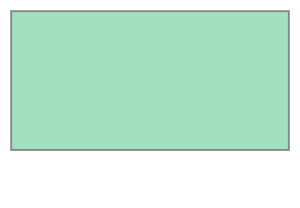

In [14]:
poly_without_hole = Polygon(shell=exterior)
poly_without_hole

_**Figure 6.4**. A Shapely Polygon geometry (exterior) without any holes._

In a similar manner, we can make a `Polygon` with a hole by passing the variable containing the coordinates of the hole into the parameter `holes`:

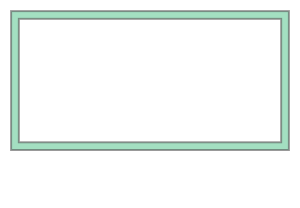

In [15]:
poly_with_hole = Polygon(shell=exterior, holes=hole)
poly_with_hole

_**Figure 6.5**. A Shapely Polygon geometry with a single hole inside of it._

As we can see, now the Polygon contains a large hole inside of it, and the actual geometry is located at the borders, resembling a frame of a painting. Let's also take a look how the WKT representation of the polygon looks like:

In [31]:
poly_with_hole.wkt

'POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))'

As we can see the `Polygon` has now two different tuples of coordinates. The first one represents the outer ring and the second one represents the inner ring, i.e. the hole. 

There are many useful attributes and methods related to shapely `Polygon`, such as `area`, `centroid`, `bounding box`, `exterior`, and `exterior-length`. For a full list, see the `shapely` documentation [^shapely]. Same attributes and methods are also available when working with polygon data in `geopandas`. Here are a couple of polygon attributes that are often useful when doing geographic data analysis:

In [17]:
print("Polygon centroid: ", poly.centroid)
print("Polygon Area: ", poly.area)
print("Polygon Bounding Box: ", poly.bounds)
print("Polygon Exterior: ", poly.exterior)
print("Polygon Exterior Length: ", poly.exterior.length)

Polygon centroid:  POINT (6.22 -7.785333333333334)
Polygon Area:  86.789
Polygon Bounding Box:  (2.2, -25.1, 9.26, 4.2)
Polygon Exterior:  LINEARRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2)
Polygon Exterior Length:  62.16395199996553


Notice, that the `length` and `area` information are presented here following the units of the input coordinates. In our case, the coordinates actually represent longitude and latitude values. Thus, the lenght and area are represented as decimal degrees in this case. We can turn this information into a more sensible format (in meters and m2) when we start working with data in a projected coordinate system later in the book. 

Box polygons that represent the minimum bounding box of given coordinates are useful in many applications. `shapely.box` can be used for creating rectangular box polygons based on on minimum and maximum `x` and `y` coordinates that represent the coordinate information of the bottom-left and top-right corners of the rectangle. Here we will use `shapely.box` to re-create the same polygon exterior.  

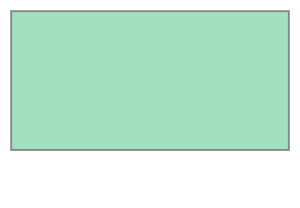

In [18]:
from shapely.geometry import box

min_x, min_y = -180, -90
max_x, max_y = 180, 90
box_poly = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)
box_poly

_**Figure 6.6**. A Shapely Polygon geometry created with the `box` helper class._

In [32]:
box_poly.wkt

'POLYGON ((180 -90, 180 90, -180 90, -180 -90, 180 -90))'

In practice, the `box` function is quite useful for example when you want to select geometries from a specific area of interest. In these cases, you only need to find out the coordinates of two points on the map (bottom-left and top-righ corners) to be able create the bounding box polygon.   

### Creating MultiPoint, MultiLineString and MultiPolygon geometries

Creating a collection of `Point`, `LineString` or `Polygon` objects is very straightforward now as you have seen how to create the basic geometric objects. In the `Multi` -versions of these geometries, you just pass a list of points, lines or polygons to the `MultiPoint`, `MultiLineString` or `MultiPolygon` constructors as shown below:

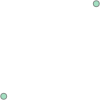

In [20]:
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon

multipoint = MultiPoint([Point(2, 2), Point(3, 3)])
multipoint

_**Figure 6.7**. A Shapely MultiPoint geometry consisting of two Point objects._

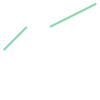

In [21]:
multiline = MultiLineString(
    [LineString([(2, 2), (3, 3)]), LineString([(4, 3), (6, 4)])]
)
multiline

_**Figure 6.8**. A Shapely MultiLineString geometry consisting of two LineString objects._

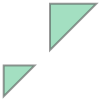

In [22]:
multipoly = MultiPolygon(
    [Polygon([(0, 0), (0, 4), (4, 4)]), Polygon([(6, 6), (6, 12), (12, 12)])]
)
multipoly

_**Figure 6.9**. A Shapely MultiPolygon geometry consisting of two Polygon objects._

#### Question 6.1

Create these shapes using Shapely!

- **Triangle**   
- **Square**    
- **Circle**

In [23]:
# Use this cell to enter your solution.

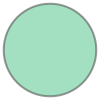

In [24]:
# Solution

# Triangle
Polygon([(0, 0), (2, 4), (4, 0)])

# Square
Polygon([(0, 0), (0, 4), (4, 4), (4, 0)])

# Circle (using a buffer around a point)
point = Point((0, 0))
point.buffer(1)

## Footnotes

[^GEOS]: <https://trac.osgeo.org/geos>
[^OGC_sfa]: <https://www.ogc.org/standards/sfa>
[^polygon]: <https://shapely.readthedocs.io/en/stable/manual.html#polygons>
[^PostGIS]: <https://postgis.net/>
[^QGIS]: <http://www.qgis.org/en/site/>
[^shapely]: <https://shapely.readthedocs.io/en/stable/manual.html>
[^WKT]: <https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry>